In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bsd_dataset import get_dataset, regions, DatasetRequest
import bsd_dataset.common.visualizations as viz

import numpy as np
import torch

/home/jason.jewik/miniconda3/envs/downscale-gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
variable = [
    'daily_maximum_near_surface_air_temperature',
    'daily_minimum_near_surface_air_temperature',
    'near_surface_air_temperature',
    'near_surface_specific_humidity',
    'near_surface_wind_speed',
    'precipitation',
    'sea_level_pressure'
]

input_datasets = [
    DatasetRequest(
        dataset='projections-cmip6',
        model='gfdl_esm4',
        variable=variable
    )
]

target_dataset = DatasetRequest(dataset='chirps', resolution=0.25)

root = f'/home/data/BSDD/experiment-0.1'
study_region = regions.SouthAmerica

In [4]:
dataset = get_dataset(
    input_datasets,
    target_dataset,
    train_region=study_region,
    val_region=study_region,
    test_region=study_region,
    train_dates=('1983-01-01', '2010-12-31'),
    val_dates=('2011-01-01', '2012-12-31'),
    test_dates=('2013-01-01', '2014-12-31'),
    download=False,
    extract=False, 
    root=root
)

In [5]:
test_dataset = dataset.get_split('test')

In [6]:
x, y, info = test_dataset[0]
noise = np.random.normal(1, 10, y.shape)
y_pred = y * noise

Plot ground truth.

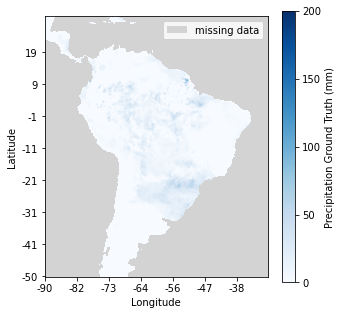

In [7]:
viz.show_ground_truth(y, study_region)

Plot bias (predicted minus observed).

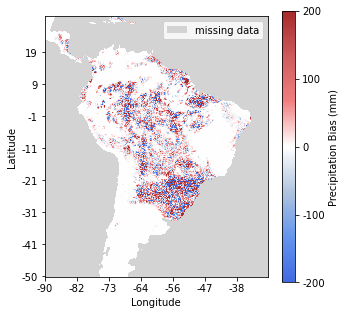

In [8]:
viz.show_bias(y_pred, y, study_region)

Plot the number of standard deviations that the truth is above or below the mean.

In [9]:
means = y * np.random.normal(1, 3, y.shape)
variances = torch.Tensor(np.abs(np.random.normal(10, 10, y.shape)))

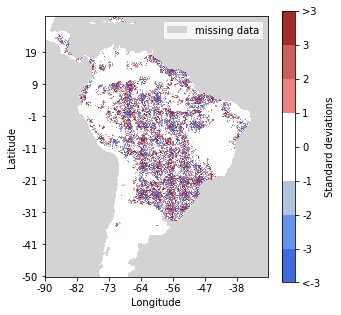

In [10]:
viz.show_uncertainty(means, variances, y, info['y_mask'], study_region)

Plot RMSE over time.

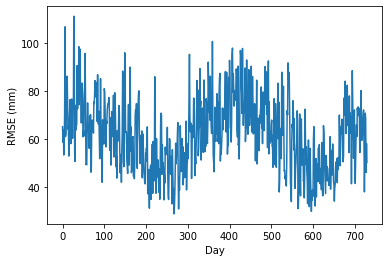

In [11]:
y_true = []
y_preds = []
masks = []
for _, y, info in test_dataset:
    noise = np.random.normal(1, 10, y.shape)
    yy = y * noise
    y_true.append(y)
    y_preds.append(yy)
    masks.append(info['y_mask'])

viz.show_rmse(y_preds, y_true, masks)